In [265]:
pip install clean_text

In [332]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade pillow

In [1]:
# import required all librarires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk, re
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from cleantext import clean
from wordcloud import WordCloud, STOPWORDS
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix ,accuracy_score, classification_report

In [2]:
# Add the Data using pandas to Corpus variable
Corpus = pd.read_csv(r"D:\\DS\\res.csv" )

In [3]:
# show the first 5 rows
Corpus.head()

,review,sentiment
0,Wow... Loved this place.,positive
1,Crust is not good.,negative
2,Not tasty and the texture was just nasty.,negative
3,Stopped by during the late May bank holiday of...,positive
4,The selection on the menu was great and so wer...,positive


In [4]:
# number of rows and columns
Corpus.shape

(988, 2)

In [5]:
# dataset information
Corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     988 non-null    object
 1   sentiment  988 non-null    object
dtypes: object(2)
memory usage: 15.6+ KB


In [6]:
# check for duplicated records , if any, keep first duplicated record and remove the rest
print (Corpus.duplicated())
Corpus.drop_duplicates(keep='first')
Corpus.shape

0      False
1      False
2      False
3      False
4      False
       ...  
983    False
984    False
985    False
986    False
987    False
Length: 988, dtype: bool


(988, 2)

In [7]:
# check missing values
Corpus['review'].isna().sum()

0

positive    496
negative    492
Name: sentiment, dtype: int64

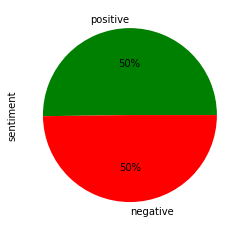

In [8]:
# counting values of sentiment variable, and plot it
Corpus.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "green", "red"])
Corpus.sentiment.value_counts()

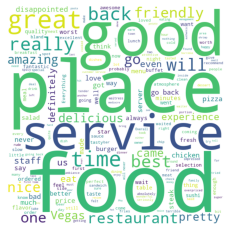

In [9]:
#  word cloud for review
words = Corpus['review'].tolist()

# create a WordCloud object
wordc = WordCloud(width=600, height=600, background_color="white", stopwords=STOPWORDS)

# generate the word cloud
wordc.generate(" ".join(words))

# Plot the word cloud
plt.imshow(wordc)
plt.axis("off")
plt.show()

In [10]:
# create a list
text2 = list(Corpus['review'])

# number of words in reviews  
word_len=0
for i in range(len(text2)):
    l=len (text2[i])
    word_len=word_len+l
print ("number of words in review",word_len)
 
# number of distinct words in reviews
dword_len=0
for i in range(len(text2)):
    l=len(set (text2[i]))
    dword_len=dword_len+l
print ("number of distinct words in review",dword_len)

#Lexical diversity of reviews
print ("Lexical diversity of reviews: %", 100 * (dword_len / word_len))

number of words in review 57988
number of distinct words in review 20082
Lexical diversity of reviews: % 34.631303028212734


In [11]:
# sort distinct values in review 
sorted(set(Corpus['review']))

['!....THE OWNERS REALLY REALLY need to quit being soooooo cheap let them wrap my freaking sandwich in two papers not one!',
 "(It wasn't busy either) Also, the building was FREEZING cold.",
 '(The bathroom is just next door and very nice.)',
 '* Both the Hot & Sour & the Egg Flower Soups were absolutely 5 Stars!',
 '-Drinks took close to 30 minutes to come out at one point.',
 '2 Thumbs Up!!',
 '2 times - Very Bad Customer Service !',
 '5 stars for the brick oven bread app!',
 'A FLY was in my apple juice.. A FLY!!!!!!!!',
 'A couple of months later, I returned and had an amazing meal.',
 'A fantastic neighborhood gem !!!',
 'A good time!',
 'A greasy, unhealthy meal.',
 'A great touch.',
 'A great way to finish a great.',
 'A lady at the table next to us found a live green caterpillar In her salad.',
 'AN HOUR... seriously?',
 'AVOID THIS ESTABLISHMENT!',
 'After 20 minutes wait, I got a table.',
 'After I pulled up my car I waited for another 15 minutes before being acknowledged.',


In [12]:
#requency distribution of review values
FreqDist(Corpus['review'])

FreqDist({'Wow... Loved this place.': 1, 'Crust is not good.': 1, 'Not tasty and the texture was just nasty.': 1, 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.': 1, 'The selection on the menu was great and so were the prices.': 1, 'Now I am getting angry and I want my damn pho.': 1, "Honeslty it didn't taste THAT fresh.)": 1, 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.': 1, 'The fries were great too.': 1, 'A great touch.': 1, ...})

In [13]:
# POS tagging 
text2 = list(Corpus['review'].head(5))
for i in range(len(text2)):
    tag= word_tokenize(text2[i]) 
    tag = nltk.pos_tag(tag, tagset='universal')
    tag.append(tag)
print (" number ot tags:",len(tag),"\n", tag)


 number ot tags: 14 
 [('The', 'DET'), ('selection', 'NOUN'), ('on', 'ADP'), ('the', 'DET'), ('menu', 'NOUN'), ('was', 'VERB'), ('great', 'ADJ'), ('and', 'CONJ'), ('so', 'ADV'), ('were', 'VERB'), ('the', 'DET'), ('prices', 'NOUN'), ('.', '.'), [...]]


In [14]:
# create a list text
text = list(Corpus['review'])

#stemming using Porter Stemmer
stemmer = PorterStemmer()

#lemmatization using Word Net Lemmatizer
lemmatizer = WordNetLemmatizer()


In [15]:

corpus1 = []

for i in range(len(text)):
        
    rev = re.sub('[^a-zA-Z]', ' ', text[i]) # remove non-alphabetic characters  
    
    # remove numbers, punctuation, emoji ,  no_currency_symbols, and url
    rev=clean(rev, no_urls=True ,no_numbers=True, no_currency_symbols=True,  no_punct=True,no_emoji=True)
 
    rev = rev.lower() #  converts all uppercase characters to lowercase
    rev = word_tokenize(rev)  # tokenize the text 
 
    rev = [word for word in rev if word not in stopwords.words('english')] # remove stopwords
   
    rev = [stemmer.stem(word) for word in rev] #apply stemming 
    
    rev = [lemmatizer.lemmatize(word) for word in rev] # appy lemmatization 

    rev = ' '.join(rev)  # Join the words back into a string
    corpus1.append(rev)

In [23]:
#show normlized text by index
Corpus[0:1]

,review,sentiment,review2
0,Wow... Loved this place.,positive,wow love place


In [24]:
#assign corpus1 to data in new columne (review2) after preprocessing
Corpus['review2'] = corpus1
Corpus.head(10)

,review,sentiment,review2
0,Wow... Loved this place.,positive,wow love place
1,Crust is not good.,negative,crust good
2,Not tasty and the texture was just nasty.,negative,tasti textur nasti
3,Stopped by during the late May bank holiday of...,positive,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,positive,select menu great price
5,Now I am getting angry and I want my damn pho.,negative,get angri want damn pho
6,Honeslty it didn't taste THAT fresh.),negative,honeslti tast fresh
7,The potatoes were like rubber and you could te...,negative,potato like rubber could tell made ahead time ...
8,The fries were great too.,positive,fri great
9,A great touch.,positive,great touch


In [25]:
# assign values of sentiment and review  to label and text
label = Corpus.iloc[:, 1].values
text= Corpus.iloc[:, 0].values

In [26]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.3, random_state=0)

In [27]:
# display the values after splitting
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(691,) (297,) (691,) (297,)


In [28]:
# Create feature vectors: weights the words counts by a measure of how often they appear in the file
# Vectorize the words by using TF-IDF Vectorizer - This is done to find how important a word in document
# is in comaprison to the corpus
vectorizer = TfidfVectorizer()                                
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)                                   

In [29]:
train_vectors

<691x1669 sparse matrix of type '<class 'numpy.float64'>'
	with 6978 stored elements in Compressed Sparse Row format>

In [30]:
test_vectors 

<297x1669 sparse matrix of type '<class 'numpy.float64'>'
	with 2359 stored elements in Compressed Sparse Row format>

In [31]:
# apply MultinomialNB classifier
classifier = MultinomialNB()

# fit the training dataset on the classifier
classifier.fit(train_vectors, y_train)
# predict the labels on test dataset
predictions = classifier.predict(test_vectors)

print (predictions)

['positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'negative' 'positive' 'positive' 'positive' 'positive' 'positive'
 'negative' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'negat

In [32]:
# confusion matrix
cm = confusion_matrix(y_test, predictions)

# display confusion matrix
print('confusion matrix: \n')
labels = np.unique(y_test)
pd.DataFrame(cm, index=labels, columns=labels)

confusion matrix: 



,negative,positive
negative,101,53
positive,25,118


In [33]:
# count positive predictions
def count (count):
    count_positive=0
    for i in range(len(count)):
        if count[i] == 'positive':
            count_positive=count_positive+1
           
# count negative predictions
    count_negative=0
    for i in range(len(count)):
        if count[i] == 'negative':
            count_negative=count_negative+1

    print (' nummber of positive:',count_positive, '\n number of negative:', count_negative)
    total = [count_positive,count_negative]
    return (total)


 nummber of positive: 143 
 number of negative: 154


([<matplotlib.patches.Wedge at 0x1e2f5ec24c0>,
 [Text(0.06395927372182307, 1.0981389763162843, '143'),
  Text(-0.06395927372182296, -1.0981389763162843, '154')],
 [Text(0.03488687657553985, 0.5989848961725187, '48%'),
  Text(-0.03488687657553979, -0.5989848961725187, '52%')])

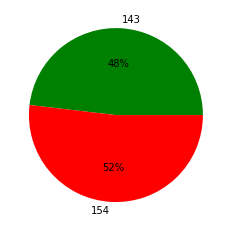

In [48]:
# visualize the values of y_test
total1=count(y_test)
plt.pie(total1 ,labels=total1, autopct='%1.0f%%', colors=[ "green", "red"])

 nummber of positive: 171 
 number of negative: 126


([<matplotlib.patches.Wedge at 0x1e2f5a7d100>,
 [Text(-0.25933478659950565, 1.0689927354567894, '171'),
  Text(0.2593347865995055, -1.0689927354567894, '126')],
 [Text(-0.14145533814518488, 0.5830869466127941, '58%'),
  Text(0.1414553381451848, -0.5830869466127941, '42%')])

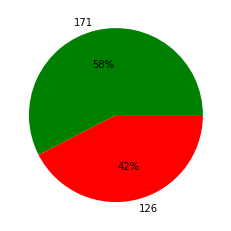

In [35]:
# visualize the values of predictions
total2=count(predictions)
plt.pie(total2 ,labels=total2, autopct='%1.0f%%', colors=[ "green", "red"])

In [36]:
# display the model accuracy
print("The model accuracy: % " , round(  accuracy_score(y_test, predictions), 2)*100)

The model accuracy: %  74.0


In [40]:
print("Classification Report : \n ", classification_report(y_test , predictions))

Classification Report : 
                precision    recall  f1-score   support

    negative       0.80      0.66      0.72       154
    positive       0.69      0.83      0.75       143

    accuracy                           0.74       297
   macro avg       0.75      0.74      0.74       297
weighted avg       0.75      0.74      0.74       297



In [41]:
##########################################################################################################

In [46]:
 # checking for specific reviews by index
predictions[1:10]

array(['positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative'], dtype='<U8')

In [45]:
##########################################################################################################